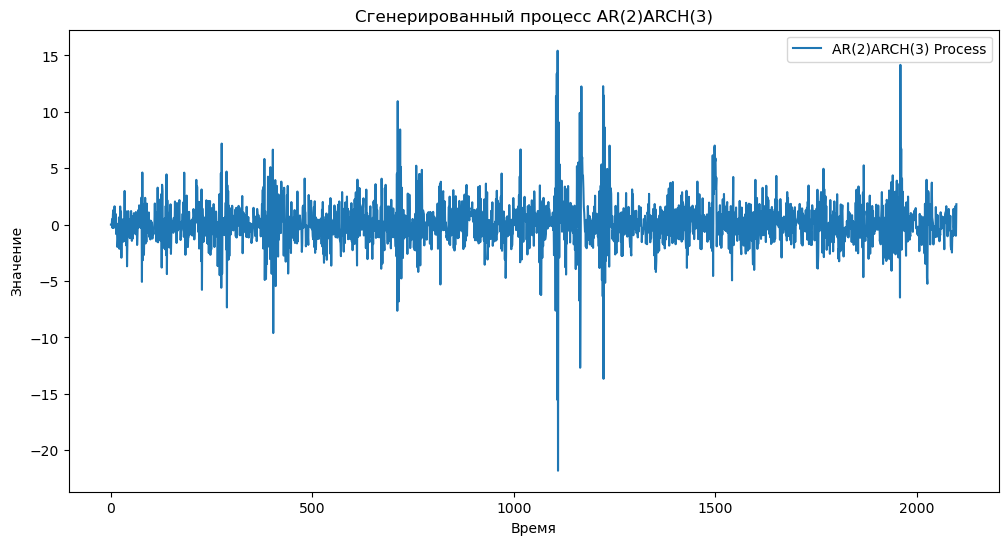

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
theta = [-0.3, 0.4]  
a = [1.0, 0.2, 0.1, 0.2] 
n = 2100  # Количество наблюдений

# Инициализация массивов
x = np.zeros(n)
sigma = np.zeros(n)

def ArArch(n):
    x = np.zeros(n)
    sigma = np.zeros(n)
    for t in range(3, n):
        sigma[t] = a[0] + a[1] * x[t-1]**2 + a[2] * x[t-2]**2 + a[3] * x[t-3]**2
        x[t] = theta[0] * x[t-1] + theta[1] * x[t-2] + np.random.normal(0, 1) * np.sqrt(sigma[t])
    vector = [x, sigma]
    return vector
# Генерация процесса

np.random.seed(42)  # Для воспроизводимости
result = ArArch(n)


# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(result[0], label="AR(2)ARCH(3) Process")
plt.title("Сгенерированный процесс AR(2)ARCH(3)")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.show()


In [220]:
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

train_size = 2000
x = result[0]
train, test = x[:train_size], x[train_size:]

# Оценка параметров AR(2)
model_ar = ARIMA(train, order=(2, 0, 0))
result_ar = model_ar.fit()
theta_hat = result_ar.params[:3][1:]
print("Оценка параметров AR(2) theta:", theta_hat)

# Оценка параметров ARCH(3)
residuals = result_ar.resid
model_arch = arch_model(residuals, vol="ARCH", p=3)
result_arch = model_arch.fit()
a_hat = result_arch.params
print("Оценка параметров A:", a_hat)

Оценка параметров AR(2) theta: [-0.29957058  0.35306217]
Iteration:      1,   Func. Count:      7,   Neg. LLF: 10068.986943600172
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5731495.638849864
Iteration:      3,   Func. Count:     23,   Neg. LLF: 50153.98335812868
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3782.859544461744
Iteration:      5,   Func. Count:     38,   Neg. LLF: 3895.1852073500404
Iteration:      6,   Func. Count:     45,   Neg. LLF: 3730.2021197912427
Iteration:      7,   Func. Count:     52,   Neg. LLF: 3850.7882295738113
Iteration:      8,   Func. Count:     59,   Neg. LLF: 3711.116682125959
Iteration:      9,   Func. Count:     66,   Neg. LLF: 3710.672107153425
Iteration:     10,   Func. Count:     72,   Neg. LLF: 3710.668765047435
Iteration:     11,   Func. Count:     78,   Neg. LLF: 3710.668752305926
Iteration:     12,   Func. Count:     83,   Neg. LLF: 3710.6687523056603
Optimization terminated successfully    (Exit mode 0)
            Current 

C:\Users\i7new\AppData\Local\Temp\ipykernel_13960\729643104.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma[t] += a_hat[k+1] * (x_train[-k]**2 if t < k else x_pred[t-k]**2 ) # берет значения из тренировочной на старте если не хватает
C:\Users\i7new\AppData\Local\Temp\ipykernel_13960\729643104.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma[t] += a_hat[1]


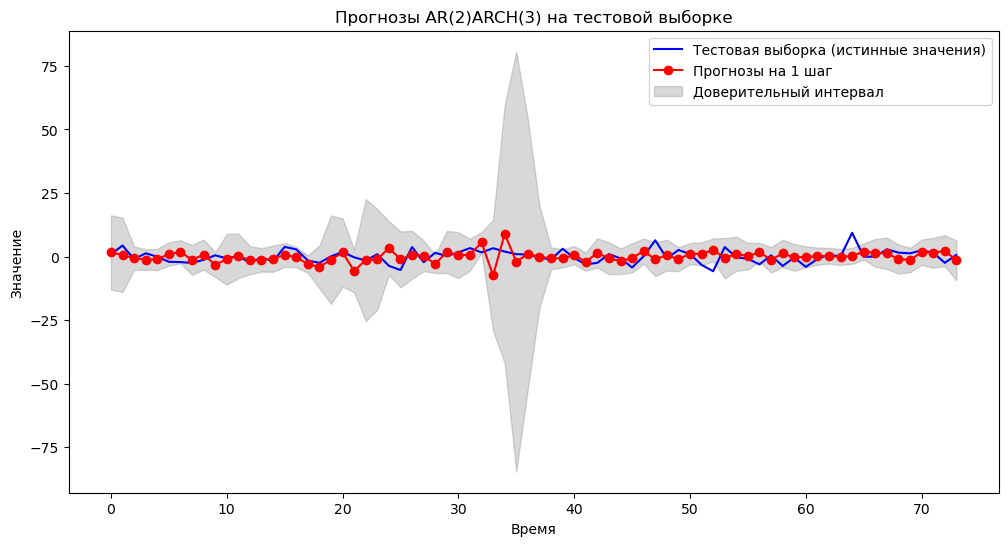

In [244]:
#Генерация прогнозов
def ArArch(x_train, n, a_hat, theta_hat):
    x_pred = np.zeros(n)
    sigma = np.zeros(n)
    for t in range(n):
        for k in range(1,4):
            sigma[t] += a_hat[k+1] * (x_train[-k]**2 if t < k else x_pred[t-k]**2 ) # берет значения из тренировочной на старте если не хватает
        sigma[t] += a_hat[1]
        for k in range(1,3):
            x_pred[t] += theta_hat[k-1] * (x_train[-k] if t < k else x_pred[t-k])
        x_pred[t] += np.random.normal(0, 1) * np.sqrt(sigma[t])
    vector = [x_pred, sigma]
    return vector

vector_res = ArArch(train, len(test), a_hat, theta_hat)
x_pred = vector_res[0]
volatility_bounds = vector_res[1]

#Построение графика прогнозов 
plt.figure(figsize=(12, 6)) 
plt.plot(range(len(test)), test, label="Тестовая выборка (истинные значения)", color="blue") 
plt.plot(range(len(test)), x_pred, label="Прогнозы на 1 шаг", marker="o", color="red") 
plt.fill_between( 
    range(len(test)), 
    x_pred - 2 * volatility_bounds,
    x_pred + 2 * volatility_bounds, 
    color="gray", 
    alpha=0.3, 
    label="Доверительный интервал" 
) 

plt.legend() 
plt.title("Прогнозы AR(2)ARCH(3) на тестовой выборке") 
plt.xlabel("Время") 
plt.ylabel("Значение") 
plt.show()

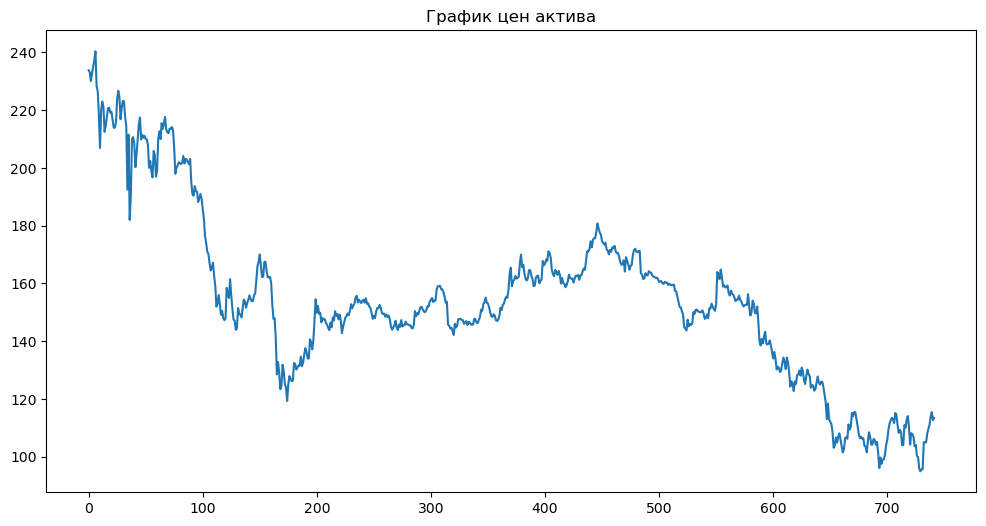

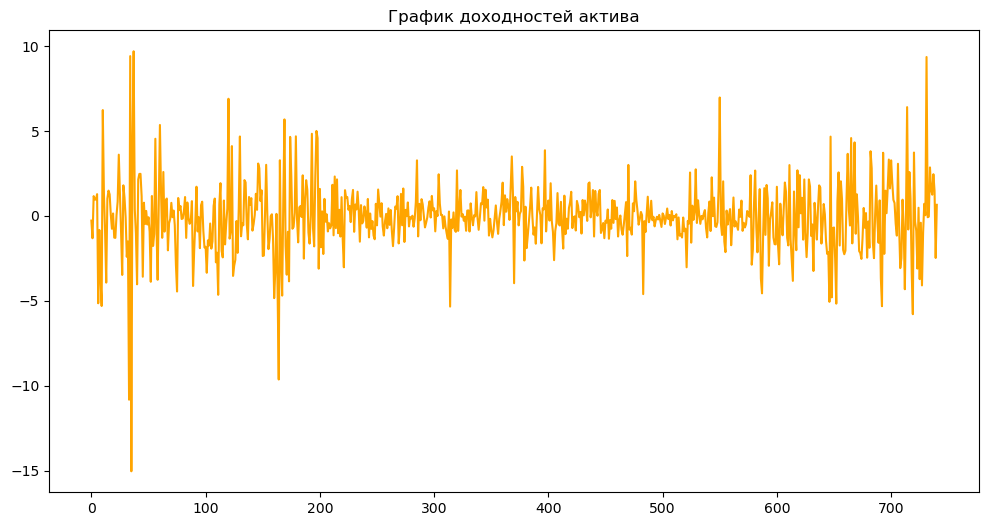

Оценка параметров AR(2) theta: [-0.08336081 -0.07395132]
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3515.6207923635625
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1704606.639524311
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1330.1730446873921
Iteration:      4,   Func. Count:     30,   Neg. LLF: 3979.701585828443
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1313.7342639670883
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1343.0199588270584
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1317.5902891214296
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1301.8122817635924
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1301.8062671052612
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1301.8061687717775
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1301.8061650936065
Iteration:     12,   Func. Count:     82,   Neg. LLF: 1301.8061650935817
Optimization terminated successfully    (Exit mode 0)
            Cur

C:\Users\i7new\AppData\Local\Temp\ipykernel_13960\1413511050.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma[t] += a_hat[k+1] * (x_train[-k]**2 if t < k else x_pred[t-k]**2 ) # берет значения из тренировочной на старте если не хватает
C:\Users\i7new\AppData\Local\Temp\ipykernel_13960\1413511050.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma[t] += a_hat[1]


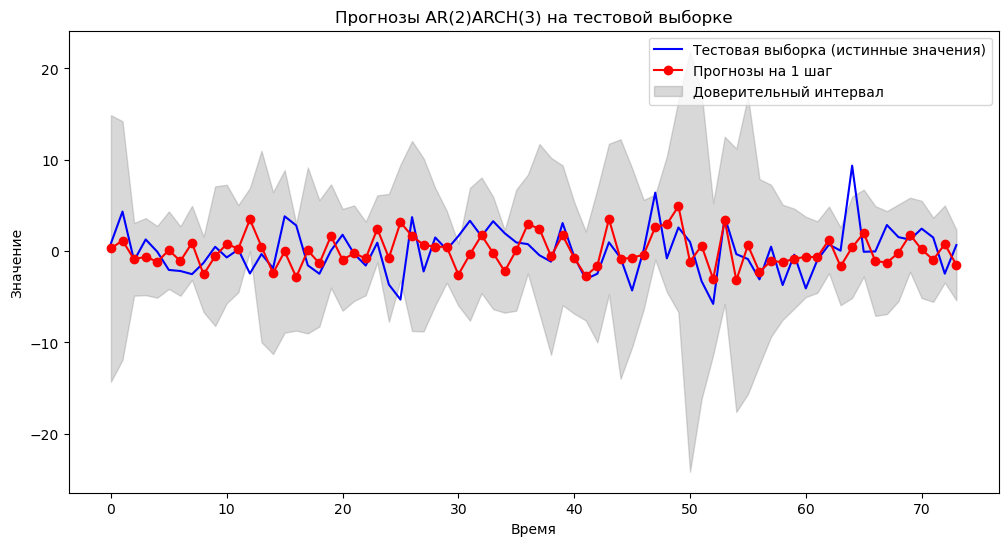

In [242]:
import pandas as pd

data = pd.read_csv("DATA_LAB3.csv", delimiter=";") # акции НорНикель

prices = data["<CLOSE>"]

z = np.diff(np.log(prices))*100  # Логарифмическая доходность

plt.figure(figsize=(12, 6))
plt.plot(prices, label="Цены актива")
plt.title("График цен актива")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(z, label="Доходности актива", color="orange")
plt.title("График доходностей актива")
plt.show()

train_size = round(len(z)*0.9)
train, test = z[:train_size], z[train_size:]

# Оценка параметров AR(2)
model_ar = ARIMA(train, order=(2, 0, 0))
result_ar = model_ar.fit()
theta_hat = result_ar.params[:3][1:]
print("Оценка параметров AR(2) theta:", theta_hat)

# Оценка параметров ARCH(3)
residuals = result_ar.resid
model_arch = arch_model(residuals, vol="ARCH", p=3)
result_arch = model_arch.fit()
a_hat = result_arch.params
print("Оценка параметров A:", a_hat)

# Построение прогноза 
vector_res = ArArch(train, len(test), a_hat, theta_hat)
x_pred = vector_res[0]
volatility_bounds = vector_res[1]

#Построение графика прогнозов 
plt.figure(figsize=(12, 6)) 
plt.plot(range(len(test)), test, label="Тестовая выборка (истинные значения)", color="blue") 
plt.plot(range(len(test)), x_pred, label="Прогнозы на 1 шаг", marker="o", color="red") 
plt.fill_between( 
    range(len(test)), 
    x_pred - 2 * volatility_bounds,
    x_pred + 2 * volatility_bounds, 
    color="gray", 
    alpha=0.3, 
    label="Доверительный интервал" 
) 

plt.legend() 
plt.title("Прогнозы AR(2)ARCH(3) на тестовой выборке") 
plt.xlabel("Время") 
plt.ylabel("Значение") 
plt.show()
